# **FINANCE 361**

**Lecture 4**

## **Noise vs Signals & Algorithmic Trading**

(The following Python code is non-examinable)

Part (1) of this notebook discusses noise vs signals in financial markets.

Part (2) of this notebook provides a simple example of algorithmic trading.


The notebook is used to facilitate discussion.

*   The coding approach does not align with the industry's best practices.
*   The code is instead designed to be easily understood and intuitive.



---



### **Part 1:  Noise vs Signals**

The concepts of noise and signal analysis used in finance have their origins in disciplines like engineering and physics.

*   In these fields, signal analysis involves extracting useful information from data that contains both a meaningful signal and noise.



The following code is an example of signal processing using the Fast Fourier Transform (FFT) to analyze the frequency components of a noisy sinusoidal signal.



*   Such analysis is common Vibration Analysis for predictive maintenance in manufacturing and mechanical systems.
*   By regularly analyzing the frequency spectrum of a machine's vibration, maintenance teams can detect early signs of wear or failure in components like bearings, gears, and shafts.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
# Parameters for the sinusoid
fs = 1000  # Sampling frequency in Hz
T = 1/fs   # Sampling period in seconds
L = 1000   # Length of signal (number of samples)
f = 60     # Frequency of the sinusoid in Hz

In [3]:
# Time vector
t = np.arange(0, L) * T

# Sinusoid signal -- with an amplitude of 0.7
signal = 0.7*np.sin(2*np.pi*f*t)

# Adding Gaussian noise to the sinusoid signal
np.random.seed(0)  # For reproducibility
noisy_signal = signal + np.random.normal(0, 1, L)

# FFT analysis
# This operation transforms the signal from the time domain into the frequency domain,
# allowing analysis of the frequency components present in the signal.
yf = fft(noisy_signal)
xf = fftfreq(L, T)[:L//2]

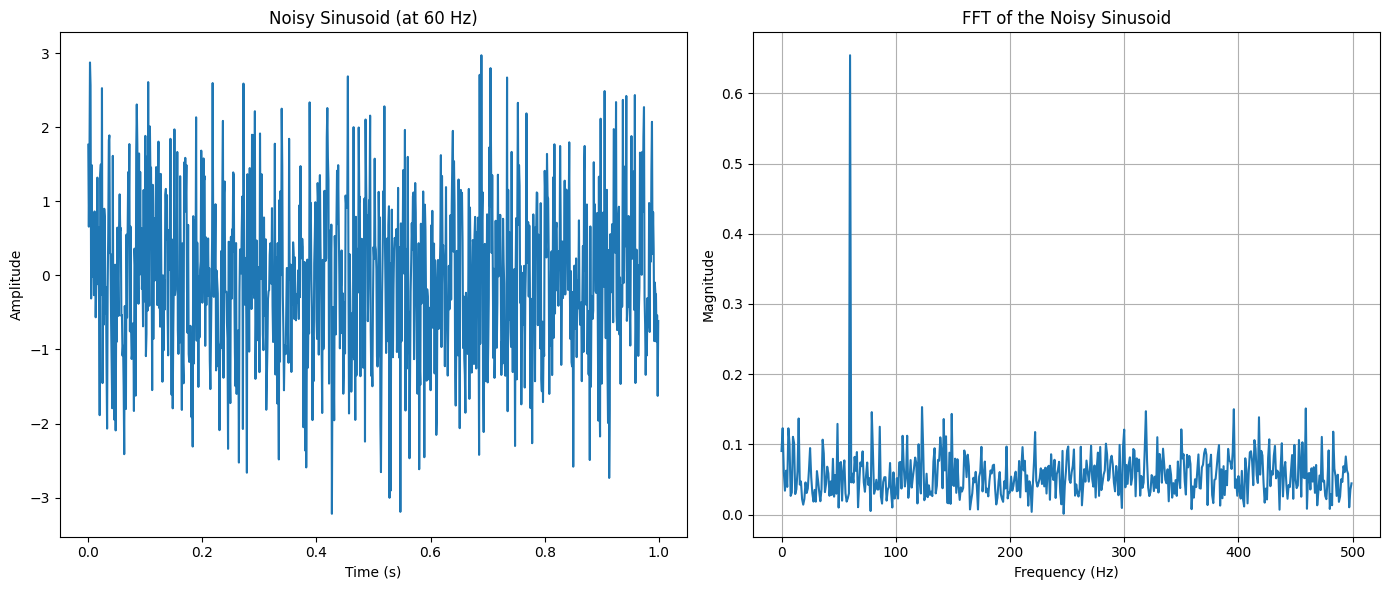

In [4]:
# Plotting the noisy sinusoid
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title('Noisy Sinusoid (at 60 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plotting the FFT
plt.subplot(1, 2, 2)
plt.plot(xf, 2.0/L * np.abs(yf[:L//2]))
plt.title('FFT of the Noisy Sinusoid')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()

Now, let's apply the same FFT analysis to daily stock market returns.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import yfinance as yf


In [6]:
# Download S&P 500 data
sp500 = yf.download('^GSPC', start='2020-01-01', end='2024-01-01')

# Calculate daily log returns
sp500['Log Returns'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))

# Drop any NaNs from the DataFrame
log_returns = sp500['Log Returns'].dropna().values

N = len(log_returns)  # Hypothetical number of samples in `log_returns`
fs = 1  # Sampling frequency, assuming 1 per day for daily data

# Perform FFT on the daily log returns
yf_sp500 = fft(log_returns)
xf_sp500 = fftfreq(N, 1/fs)[:N//2]

[*********************100%%**********************]  1 of 1 completed


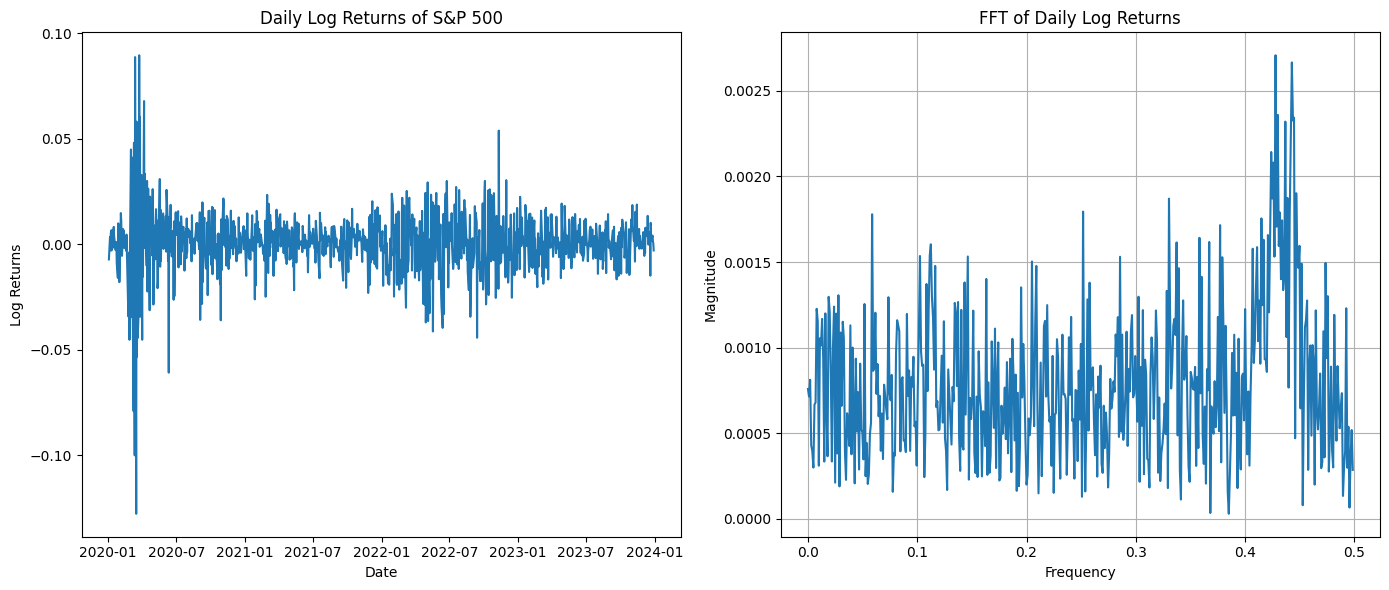

In [7]:
# Plotting the daily log returns and the FFT
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(sp500.index, sp500['Log Returns'], label='Daily Log Returns')
plt.title('Daily Log Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Log Returns')

plt.subplot(1, 2, 2)
plt.plot(xf_sp500, 2.0/N * np.abs(yf_sp500[:N//2]), label='FFT of Log Returns')
plt.title('FFT of Daily Log Returns')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.savefig('fft_sp_500.png')
plt.show()

***Noise and Signals in Financial Markets***

**Signal** -  data or information that conveys meaning.
*   Information about an asset's underlying value or future price movements. (E.g., earnings announcements, economic indicators, or changes in regulatory landscapes.)

**Noise** - the unwanted or irrelevant information that obscures or interferes with the signal.
*   Market information without a direct link to intrinsic values. (E.g., speculative trading, rumors, or emotional reactions to news events.)



### **Literature related to noise traders:**

- [Shiller (1980)](https://www.jstor.org/stable/1802789)  
    - The volatility of stock prices contradicts the efficient markets model unless the market's expectations for dividends significantly deviate from historical trends.

- [Roll (1988)](https://afajof.org/issue/volume-43-issue-3/)  
    - Even with hindsight, external economic influences, industry-specific returns, and public news events only have very limited power to explain stock price changes.

- [Cutler et al. (1989)](https://www.nber.org/system/files/working_papers/w2538/w2538.pdf)  
    - Macroeconomic news and major political/world events explain only a small fraction of stock price variance.

- [Boudoukh et al. (2013)](https://www.nber.org/system/files/working_papers/w18725/w18725.pdf)
    - news type and tone strengthen the relationship between stock price changes and information.

- [Boudoukh et al. (2019)](https://en-coller.tau.ac.il/sites/nihul_en.tau.ac.il/files/media_server/Recanati/management/seminars/account/2017/Shimon_Kogan_2017.pdf)
    - information in the news explains a significant portion of overnight idiosyncratic stock volatility.



---



### **Part 2: Algorithmic Trading**



Algorithmic trading involves using computer algorithms to execute trades based on predefined criteria.

The following code gives a basic algorithmic trading strategy using the Moving Average Crossover method on S&P 500 index data.

*   **Moving Average Crossover** -- based on the idea that the crossover of moving averages can signal changes in the market trend.
-- When the short-term moving average crosses above the long-term moving average, it's considered a positive signal, suggesting that it might be a good time to buy or enter the market.
-- Conversely, when the short-term moving average crosses below the long-term moving average, it might be a signal to sell or exit the market.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [9]:
# Download S&P 500 data
data = yf.download('^GSPC', start='2020-01-01', end='2024-01-01')


[*********************100%%**********************]  1 of 1 completed


In [10]:
# Calculate short-term and long-term moving averages
short_window = 40
long_window = 100

data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()


In [11]:
# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, -1)


<ipython-input-11-cee91262b61e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, -1)


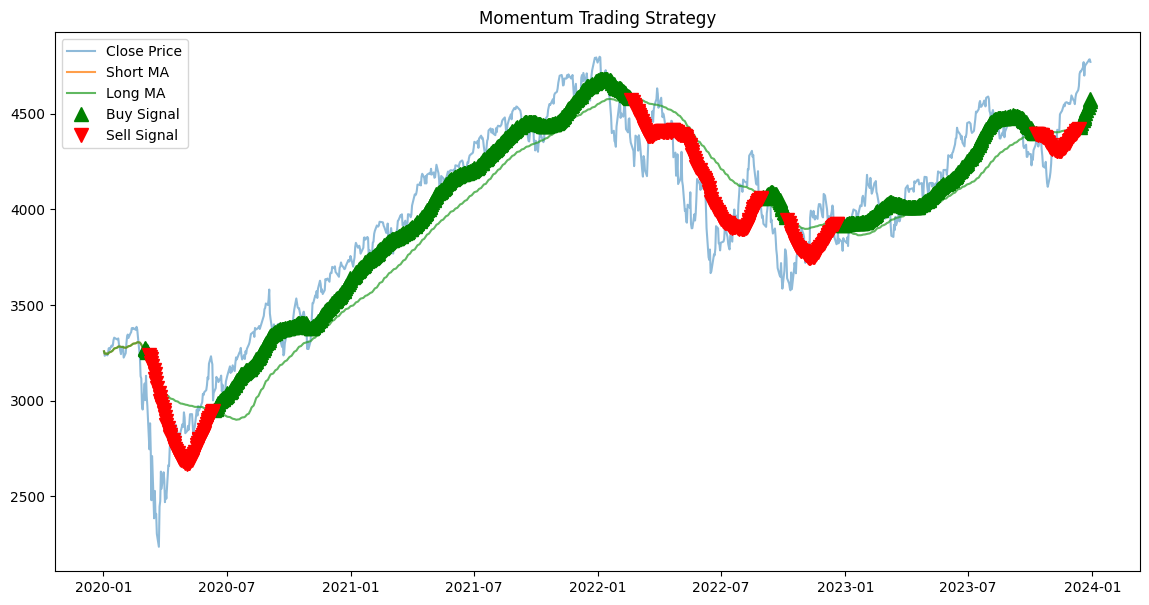

In [12]:
# Plot the closing price, the short-term and long-term moving averages and buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label='Short MA', alpha=0.75)
plt.plot(data['Long_MA'], label='Long MA', alpha=0.75)

# Highlight buy signals
plt.plot(data[data['Signal'] == 1].index,
         data['Short_MA'][data['Signal'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Highlight sell signals
plt.plot(data[data['Signal'] == -1].index,
         data['Short_MA'][data['Signal'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Momentum Trading Strategy')
plt.legend(loc='best')
plt.show()


Composer (https://www.composer.trade) and similar platforms typically provide the option to execute trades automatically based on the defined strategy rules, allowing the strategy to run in real-time with minimal manual intervention.

E.g.

    if 'Signal' == 1:

    api.submit_order(symbol=stock, qty=1, side='buy', type='market', time_in_force='gtc')

Let's have a look at more detailed trading strategies, and the backtesting of these strategies.

In [13]:
pip install backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 5.7 MB/s eta 0:00:00


In [14]:
pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.7 MB/s eta 0:00:00


In [15]:
import backtrader as bt
import yfinance as yf

import quantstats as qs

**Momentum Strategy**

The following strategy attempts to capitalize on momentum by entering positions when the short-term trend is upward (supported by increased volume) and exiting when the trend appears to reverse, using volume as a confirmation signal to increase the likelihood of trading on significant movements.

In [16]:
# Define the trading strategy class that inherits from backtrader.Strategy
class MomentumStrategy(bt.Strategy):
    # Define strategy parameters: short and long moving average windows, and volume moving average window
    params = (
        ('short_window', 40),     # Period for the short-term simple moving average (SMA)
        ('long_window', 100),     # Period for the long-term simple moving average (SMA)
        ('volume_window', 40),    # Period for the simple moving average of volume
    )

    def __init__(self):
        # Initialize the short-term SMA of the closing prices, using the period specified by short_window
        self.short_ma = bt.indicators.SMA(self.data.close, period=self.params.short_window)
        # Initialize the long-term SMA of the closing prices, using the period specified by long_window
        self.long_ma = bt.indicators.SMA(self.data.close, period=self.params.long_window)
        # Initialize the SMA of the volume, using the period specified by volume_window
        self.volume_sma = bt.indicators.SMA(self.data.volume, period=self.params.volume_window)

    def next(self):
        # Logic to execute on each tick of data (each bar/candle)

        if not self.position:  # Check if currently not holding a position
            # Buy condition: short-term SMA is above long-term SMA and current volume is above its SMA
            if self.short_ma[0] > self.long_ma[0] and self.data.volume[0] > self.volume_sma[0]:
                self.buy()  # Execute a buy order to enter the market
        else:  # Else, if currently holding a position
            # Sell condition: short-term SMA is below long-term SMA and current volume is below its SMA
            if self.short_ma[0] < self.long_ma[0] and self.data.volume[0] < self.volume_sma[0]:
                self.close()  # Execute a sell order to close the position


**Hybrid Strategy**

The following strategy uses both momentum and mean reversion indicators to make buy and sell decisions:

*   **Momentum Trading**: It uses the MACD indicator to identify the momentum. A buy signal is generated when the MACD line crosses above the signal line, suggesting an upward momentum. Conversely, a sell signal is generated when the MACD line crosses below the signal line, indicating a loss of momentum or downward movement.

*   **Mean Reversion Trading**: This part of the strategy involves the Bollinger Bands and the RSI indicator. The buy condition is triggered when the stock price is below the lower Bollinger Band and the RSI is below the oversold threshold, indicating the stock might be undervalued and due for a price correction upwards. The sell condition is the opposite, where the stock price is above the upper Bollinger Band and the RSI is above the overbought threshold, indicating the stock might be overvalued and due for a price correction downwards.

In [17]:
# Define the trading strategy class, inheriting from backtrader.Strategy
class HybridStrategy(bt.Strategy):
    # Strategy parameters including periods for momentum, mean reversion, and conditions for RSI
    params = (
        ('momentum_period', 12),    # Period for the moving average convergence divergence (MACD) indicator
        ('reversion_period', 20),   # Period for the Bollinger Bands
        ('stddev_factor', 2),       # Standard deviation factor for the width of Bollinger Bands
        ('rsi_period', 14),         # Period for the Relative Strength Index (RSI)
        ('rsi_overbought', 70),     # RSI level considered overbought
        ('rsi_oversold', 30),       # RSI level considered oversold
    )

    def __init__(self):
        # Initialize the MACD indicator for momentum analysis
        self.macd = bt.indicators.MACD(self.data.close, period_me1=self.params.momentum_period)
        # Initialize the Bollinger Bands indicator for mean reversion analysis
        self.bollinger = bt.indicators.BollingerBands(self.data.close, period=self.params.reversion_period,
                                                      devfactor=self.params.stddev_factor)
        # Initialize the RSI indicator for mean reversion analysis
        self.rsi = bt.indicators.RSI(self.data.close, period=self.params.rsi_period)

    def next(self):
        # Logic executed for each new data point

        if not self.position:  # Check if not currently in the market
            # Momentum buy condition: MACD line crosses above its signal line
            if self.macd.lines.macd[0] > self.macd.lines.signal[0]:
                self.buy()  # Execute a buy order
            # Mean reversion buy condition: Close price below the lower Bollinger Band and RSI indicates oversold
            elif self.data.close[0] < self.bollinger.lines.bot[0] and self.rsi[0] < self.params.rsi_oversold:
                self.buy()  # Execute a buy order

        else:  # If currently in the market
            # Momentum sell condition: MACD line crosses below its signal line
            if self.macd.lines.macd[0] < self.macd.lines.signal[0]:
                self.close()  # Execute a sell order to close the position
            # Mean reversion sell condition: Close price above the upper Bollinger Band and RSI indicates overbought
            elif self.data.close[0] > self.bollinger.lines.top[0] and self.rsi[0] > self.params.rsi_overbought:
                self.close()  # Execute a sell order to close the position


**Backtesting**

Now, the trading strategy can be backtested -- a method used in trading and finance to assess the viability of a trading strategy or model by simulating its performance using historical data.


*   It's important to remember that past performance is not necessarily indicative of future results.



In [18]:
# Download historical data
data = yf.download('SPY', start='2013-01-01', end='2023-01-01')
data = bt.feeds.PandasData(dataname=data)

# Create a backtest environment and add the strategy
cerebro = bt.Cerebro()
cerebro.addstrategy(HybridStrategy)
cerebro.adddata(data)

# Set initial investment and add a sizer
cerebro.broker.set_cash(10000)
cerebro.addsizer(bt.sizers.FixedSize, stake=10)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

# Run the backtest
results = cerebro.run()
portfolio_stats = results[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = portfolio_stats.get_pf_items()

# Print final portfolio value
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')

[*********************100%%**********************]  1 of 1 completed


Final Portfolio Value: 11311.40


[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2013-01-02
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             56.0%

Cumulative Return          13.11%
CAGR﹪                     0.85%

Sharpe                     0.42
Prob. Sharpe Ratio         90.4%
Smart Sharpe               0.42
Sortino                    0.58
Smart Sortino              0.58
Sortino/√2                 0.41
Smart Sortino/√2           0.41
Omega                      1.12

Max Drawdown               -6.07%
Longest DD Days            427
Volatility (ann.)          3.05%
Calmar                     0.14
Skew                       -1.01
Kurtosis                   27.36

Expected Daily %           0.0%
Expected Monthly %         0.1%
Expected Yearly %          1.24%
Kelly Criterion            5.9%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.31%
Expected Shortfall (cVaR)  -0.31%

Max Conse

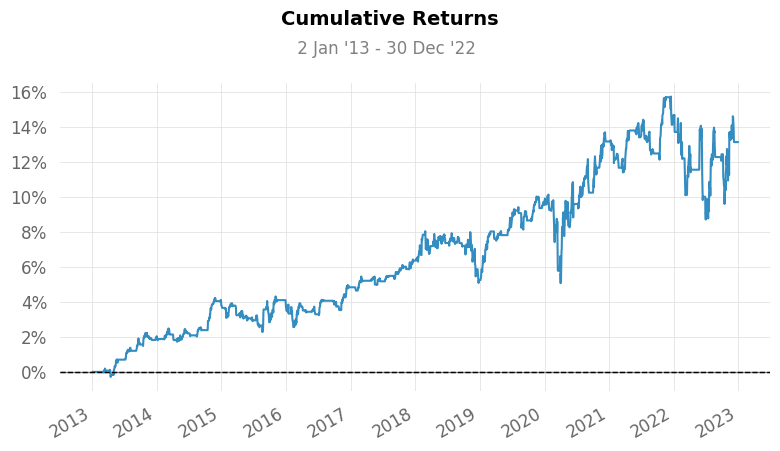

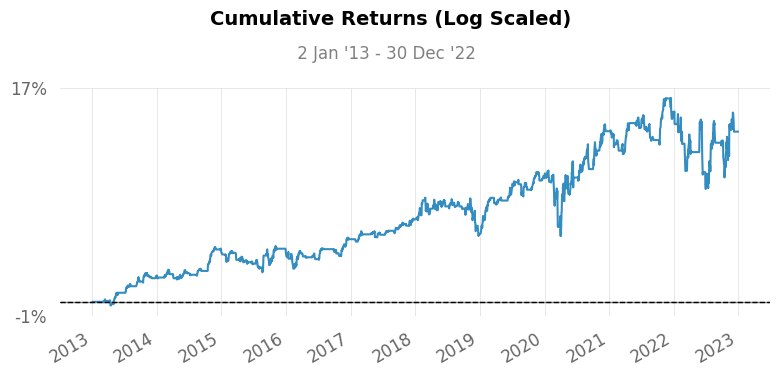

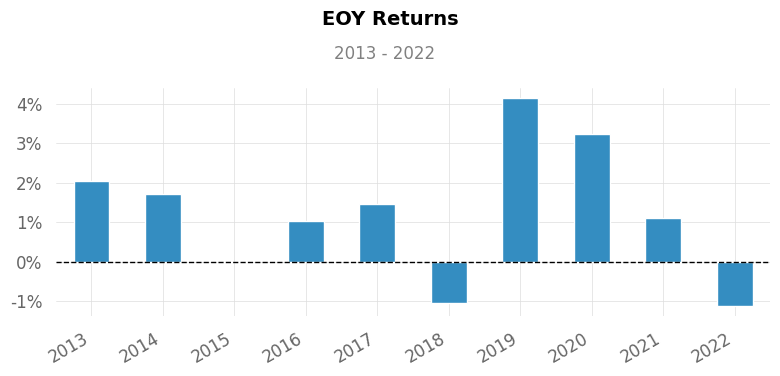

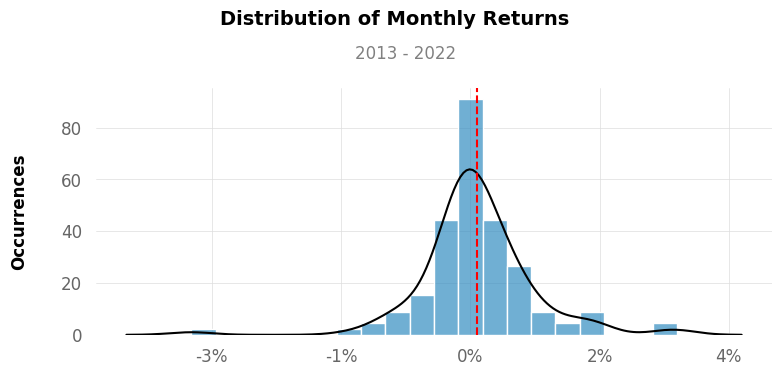

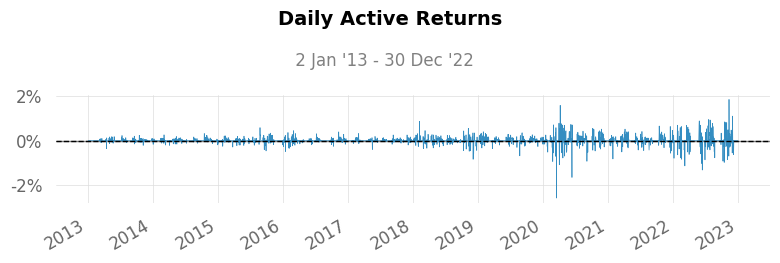

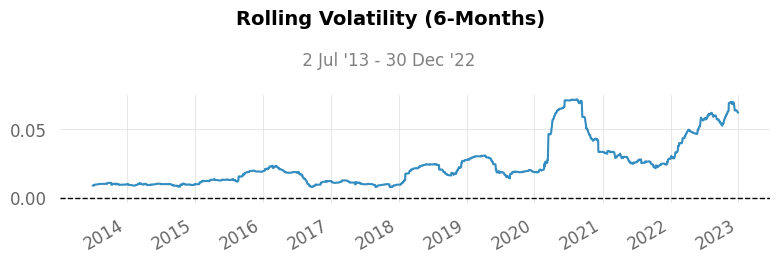

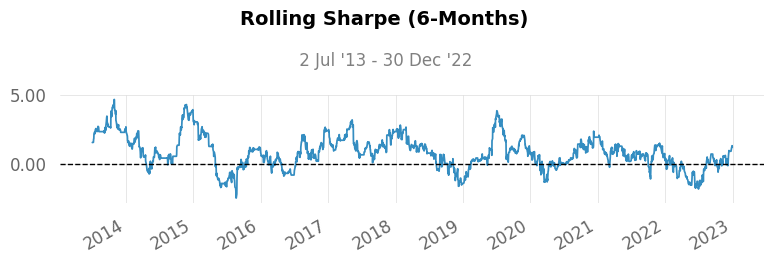

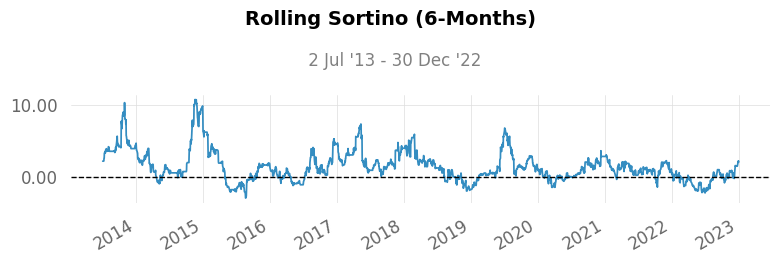

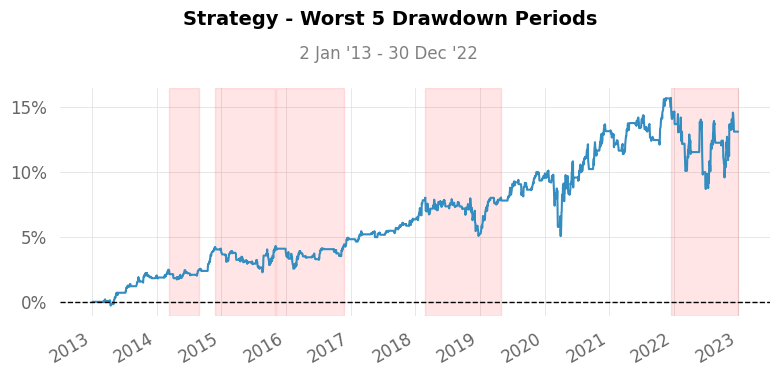

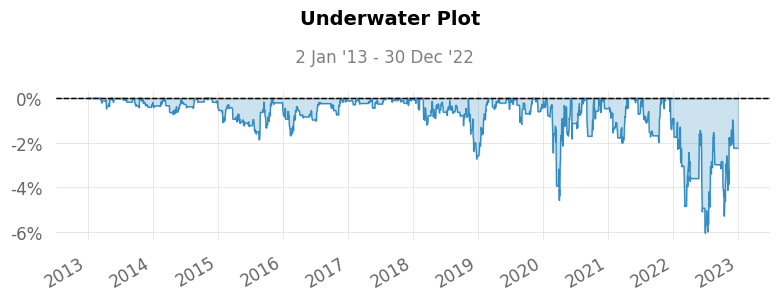

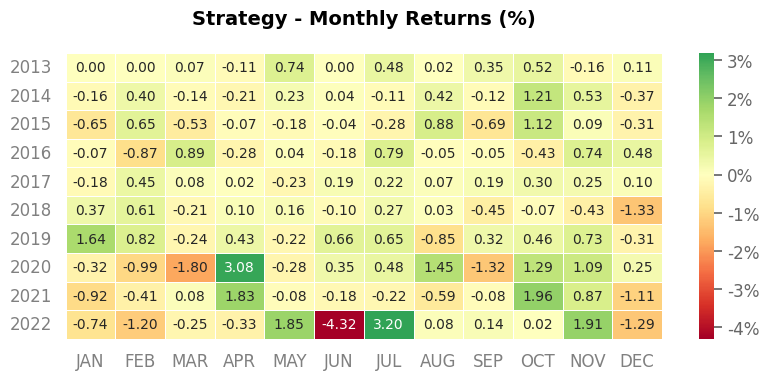

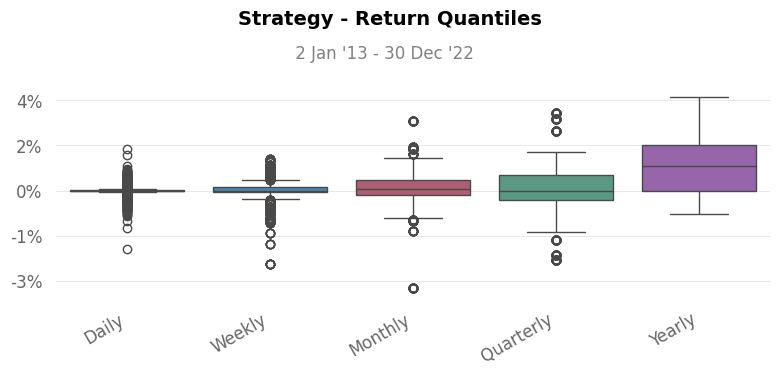

In [19]:
qs.reports.full(returns)